In [1]:
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

%config InlineBackend.figure_format = 'png2x'
plt.rcParams['font.size'] = 8

## Get thermal gens Boolean index

In [2]:
# Time steps
nt = 12

# All buses
num_buses = 118
buses = np.arange(1, num_buses+1)

# Read thermal buses
file_path = '../../data/IEEE_Case118/zones/thermal_bus.csv'
thermal_buses = pd.read_csv(file_path, header=None, index_col=None)

# Get thermal buses Boolean index
thermal_bidx = np.isin(buses, thermal_buses)

## UC prediction accuracy

#### SAGE

In [3]:
# Overall number of UC
num_data = 200

# Read ground truth
UC_true_list = np.zeros((num_data, num_buses, nt))
for i in range(num_data):
    # Read UC true
    file_path = f'./model_evaluation/SAGE/UC_true/true_{i+1}.csv'
    UC_true = pd.read_csv(file_path, header=None, index_col=None).to_numpy()
    UC_true_list[i] = UC_true.copy()

UC_true_list = UC_true_list[:, thermal_bidx, :]

# Read prediction
UC_pred_list = np.zeros((num_data, num_buses, nt))
for i in range(num_data):
    # Read UC true
    file_path = f'./model_evaluation/SAGE/UC_pred/pred_{i+1}.csv'
    UC_pred = pd.read_csv(file_path, header=None, index_col=None).to_numpy()
    UC_pred_list[i] = UC_pred.copy()

UC_pred_list = UC_pred_list[:, thermal_bidx, :]

# Compare UC_true and UC_pred
acc = (UC_true_list == UC_pred_list).astype(int)
# Calculate accuracy
mean_acc = np.mean(acc, axis=0)

# Average accuracy at each time step
x1 = np.arange(1, 13)
acc1 = mean_acc.mean(axis=0)

# Average accuracy for each thermal generator
x2 = np.arange(1, 39)
acc2 = mean_acc.mean(axis=1)

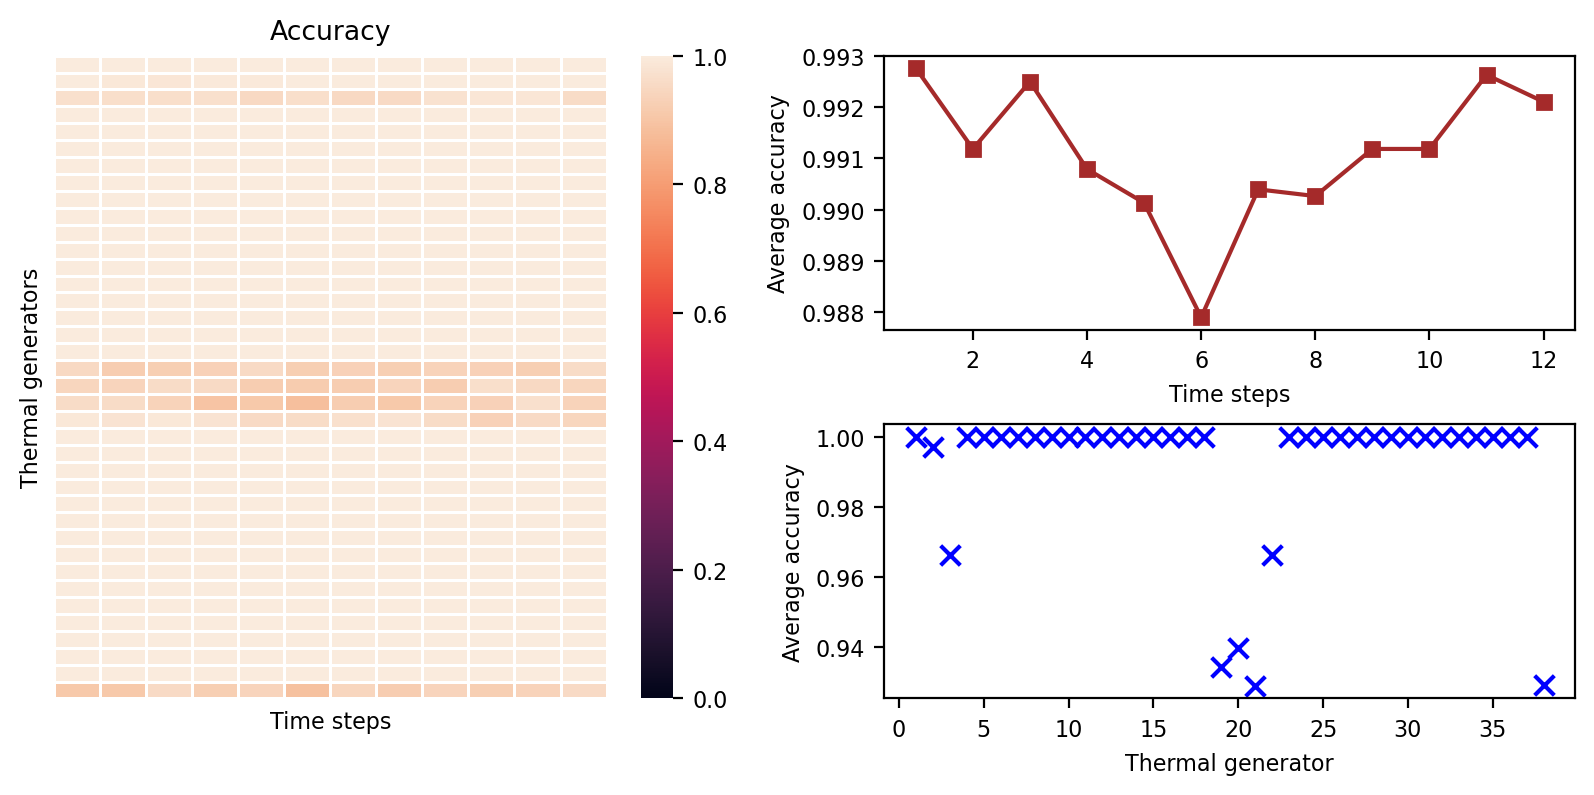

In [4]:
# Plot average accuracy
fig = plt.figure(figsize=(8, 4))
gs = GridSpec(2, 2)

# Accuracy matrix
ax = plt.subplot(gs[:, 0])
sns.heatmap(mean_acc, 
            ax=ax,
            vmin=0,
            vmax=1,
            xticklabels=[], 
            yticklabels=[],
            linewidth=0.5)
ax.set_title('Accuracy')
ax.set_xlabel('Time steps')
ax.set_ylabel('Thermal generators')

# Average accuracy at each time step
ax = plt.subplot(gs[0, 1])
ax.plot(x1, acc1, marker='s', color='brown', markersize=5)
# ax.set_ylim((0.99, 1.))
ax.set_xlabel('Time steps')
ax.set_ylabel('Average accuracy')

# Average accuracy at each thermal generator
ax = plt.subplot(gs[1, 1])
ax.scatter(x2, acc2, marker='x', color='blue', s=50)
# ax.set_ylim((0.99, 1.001))
ax.set_xlabel('Thermal generator')
ax.set_ylabel('Average accuracy')

plt.tight_layout()
plt.show()
plt.close('all')

#### GCN

In [5]:
# Overall number of UC
num_data = 200

# Read ground truth
UC_true_list = np.zeros((num_data, num_buses, nt))
for i in range(num_data):
    # Read UC true
    file_path = f'./model_evaluation/GCN/UC_true/true_{i+1}.csv'
    UC_true = pd.read_csv(file_path, header=None, index_col=None).to_numpy()
    UC_true_list[i] = UC_true.copy()

UC_true_list = UC_true_list[:, thermal_bidx, :]

# Read prediction
UC_pred_list = np.zeros((num_data, num_buses, nt))
for i in range(num_data):
    # Read UC true
    file_path = f'./model_evaluation/GCN/UC_pred/pred_{i+1}.csv'
    UC_pred = pd.read_csv(file_path, header=None, index_col=None).to_numpy()
    UC_pred_list[i] = UC_pred.copy()

UC_pred_list = UC_pred_list[:, thermal_bidx, :]

# Compare UC_true and UC_pred
acc = (UC_true_list == UC_pred_list).astype(int)
# Calculate accuracy
mean_acc = np.mean(acc, axis=0)

# Average accuracy at each time step
x1 = np.arange(1, 13)
acc1 = mean_acc.mean(axis=0)

# Average accuracy for each thermal generator
x2 = np.arange(1, 39)
acc2 = mean_acc.mean(axis=1)

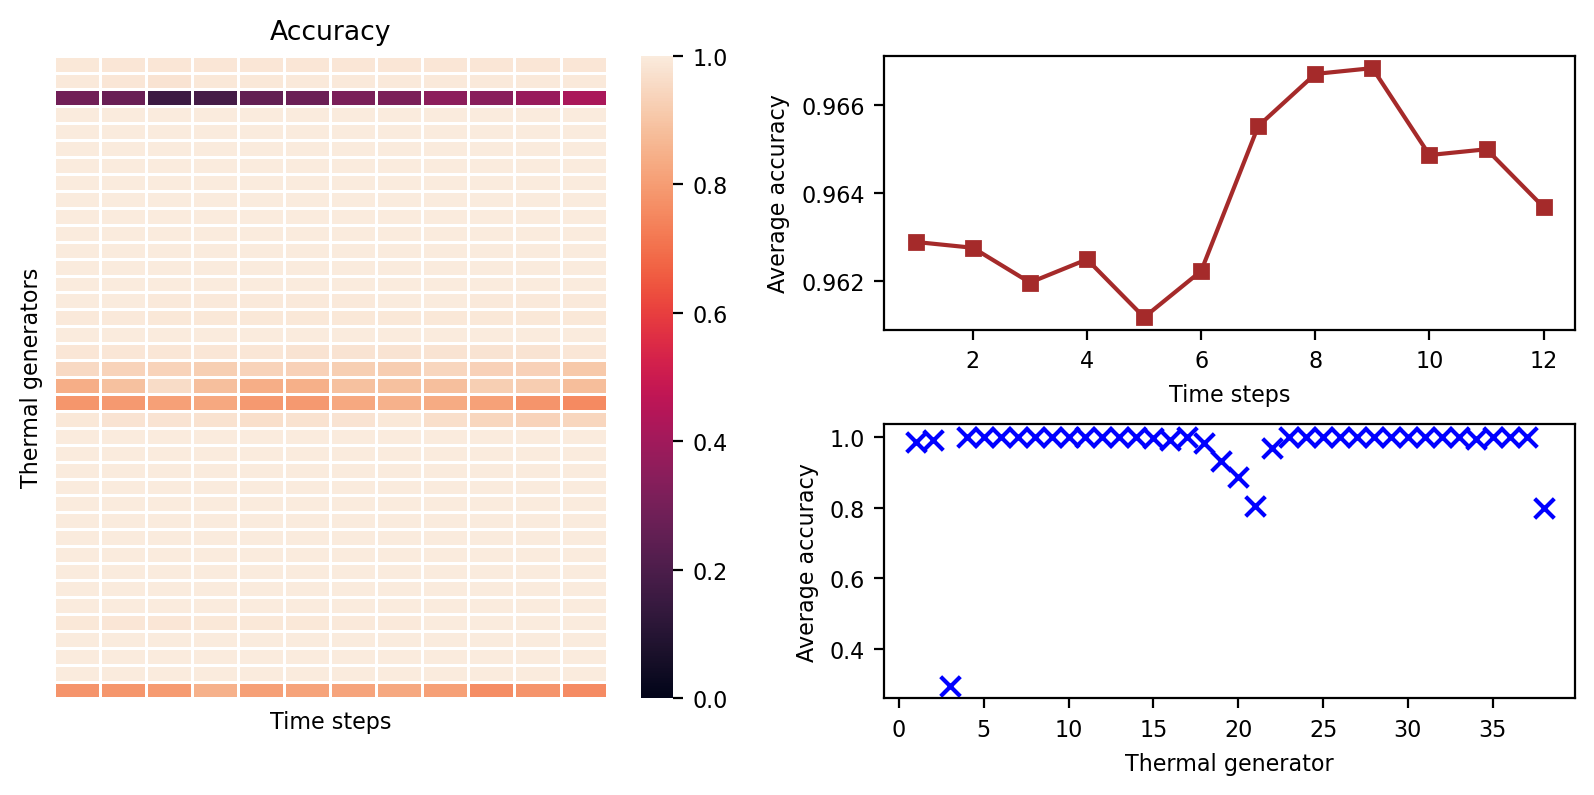

In [6]:
# Plot average accuracy
fig = plt.figure(figsize=(8, 4))
gs = GridSpec(2, 2)

# Accuracy matrix
ax = plt.subplot(gs[:, 0])
sns.heatmap(mean_acc, 
            ax=ax,
            vmin=0,
            vmax=1,
            xticklabels=[], 
            yticklabels=[],
            linewidth=0.5)
ax.set_title('Accuracy')
ax.set_xlabel('Time steps')
ax.set_ylabel('Thermal generators')

# Average accuracy at each time step
ax = plt.subplot(gs[0, 1])
ax.plot(x1, acc1, marker='s', color='brown', markersize=5)
# ax.set_ylim((0.99, 1.))
ax.set_xlabel('Time steps')
ax.set_ylabel('Average accuracy')

# Average accuracy at each thermal generator
ax = plt.subplot(gs[1, 1])
ax.scatter(x2, acc2, marker='x', color='blue', s=50)
# ax.set_ylim((0.99, 1.001))
ax.set_xlabel('Thermal generator')
ax.set_ylabel('Average accuracy')

plt.tight_layout()
plt.show()
plt.close('all')

#### ANN

In [7]:
# Overall number of UC
num_data = 200

# Read ground truth
UC_true_list = np.zeros((num_data, num_buses, nt))
for i in range(num_data):
    # Read UC true
    file_path = f'./model_evaluation/ANN/UC_true/true_{i+1}.csv'
    UC_true = pd.read_csv(file_path, header=None, index_col=None).to_numpy()
    UC_true_list[i] = UC_true.copy()

UC_true_list = UC_true_list[:, thermal_bidx, :]

# Read prediction
UC_pred_list = np.zeros((num_data, num_buses, nt))
for i in range(num_data):
    # Read UC true
    file_path = f'./model_evaluation/ANN/UC_pred/pred_{i+1}.csv'
    UC_pred = pd.read_csv(file_path, header=None, index_col=None).to_numpy()
    UC_pred_list[i] = UC_pred.copy()

UC_pred_list = UC_pred_list[:, thermal_bidx, :]

# Compare UC_true and UC_pred
acc = (UC_true_list == UC_pred_list).astype(int)
# Calculate accuracy
mean_acc = np.mean(acc, axis=0)

# Average accuracy at each time step
x1 = np.arange(1, 13)
acc1 = mean_acc.mean(axis=0)

# Average accuracy for each thermal generator
x2 = np.arange(1, 39)
acc2 = mean_acc.mean(axis=1)

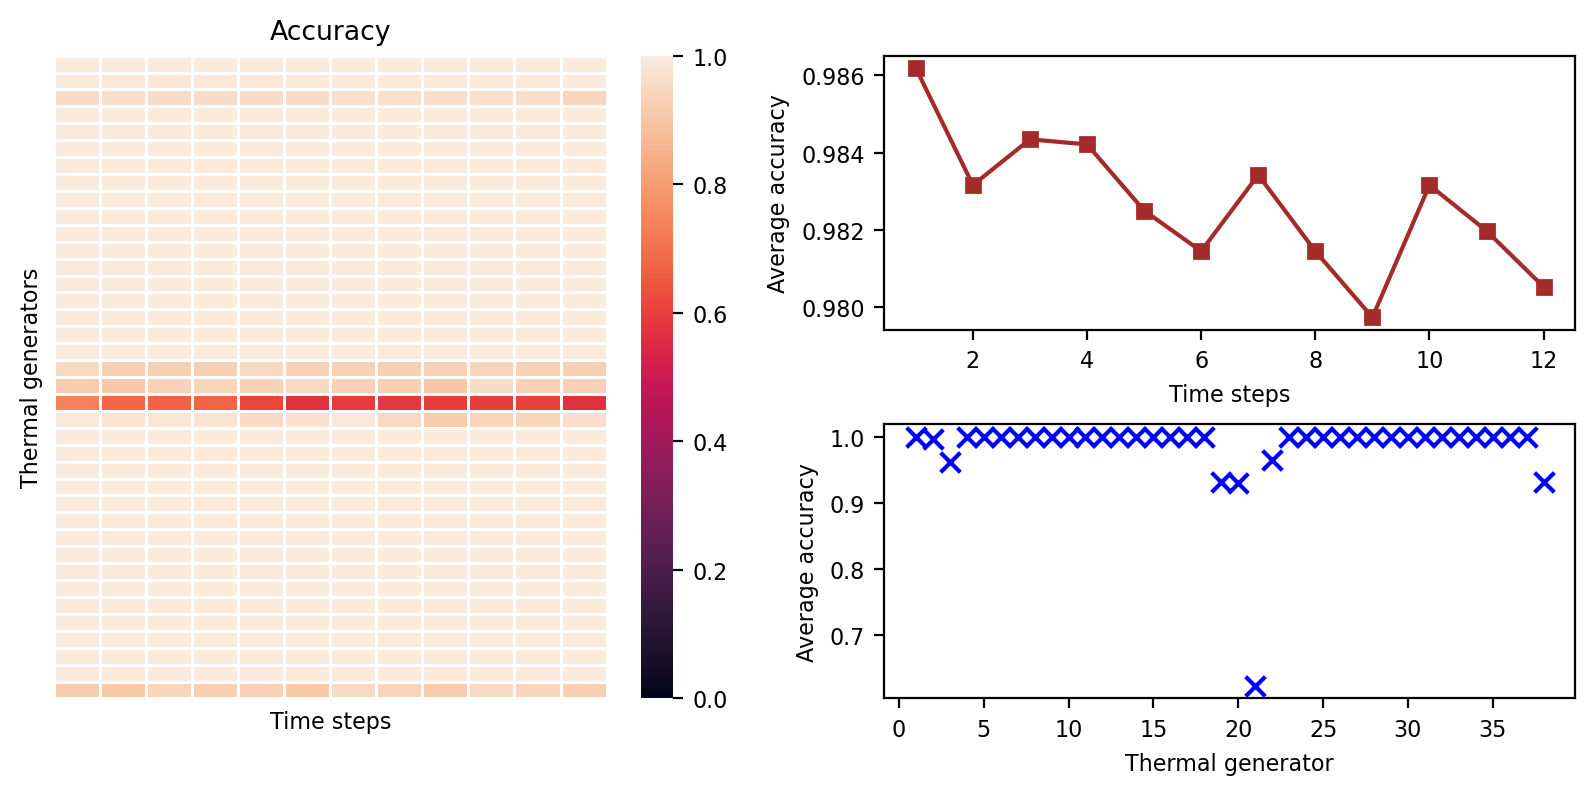

In [8]:
# Plot average accuracy
fig = plt.figure(figsize=(8, 4))
gs = GridSpec(2, 2)

# Accuracy matrix
ax = plt.subplot(gs[:, 0])
sns.heatmap(mean_acc, 
            ax=ax,
            vmin=0,
            vmax=1,
            xticklabels=[], 
            yticklabels=[],
            linewidth=0.5)
ax.set_title('Accuracy')
ax.set_xlabel('Time steps')
ax.set_ylabel('Thermal generators')

# Average accuracy at each time step
ax = plt.subplot(gs[0, 1])
ax.plot(x1, acc1, marker='s', color='brown', markersize=5)
# ax.set_ylim((0.99, 1.))
ax.set_xlabel('Time steps')
ax.set_ylabel('Average accuracy')

# Average accuracy at each thermal generator
ax = plt.subplot(gs[1, 1])
ax.scatter(x2, acc2, marker='x', color='blue', s=50)
# ax.set_ylim((0.99, 1.001))
ax.set_xlabel('Thermal generator')
ax.set_ylabel('Average accuracy')

plt.tight_layout()
plt.show()
plt.close('all')